# Project: Investigate No Show Appointment Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

> **Overview**: This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row
>

In [214]:
# Use this cell to set up import statements for all of the packages that you plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
# Data Wrangling

In [70]:
# Loaded the No Show Appointment Dataset
no_show_appt = pd.read_csv('noshowappointmentsmay-2016.csv', sep = ',')

In [231]:
#snapshot of dataset
no_show_appt.head(2)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,age_range
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,1,0,0,0,0,No,60-69
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,No,50-59


In [21]:
#counts the number of dataset for each field
no_show_appt.count()

PatientId         110527
AppointmentID     110527
Gender            110527
ScheduledDay      110527
AppointmentDay    110527
Age               110527
Neighbourhood     110527
Scholarship       110527
Hipertension      110527
Diabetes          110527
Alcoholism        110527
Handcap           110527
SMS_received      110527
No-show           110527
dtype: int64

In [23]:
#checking for null values
no_show_appt.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [24]:
#count of rows and columns
no_show_appt.shape

(110527, 14)

In [62]:
## Correcting the spelling of hypertension
no_show_appt.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [36]:
no_show_appt.columns[8]

'Hipertension'

In [80]:
no_show_appt.columns= no_show_appt.columns.str.replace('Hipertension','Hypertension')

In [81]:
no_show_appt.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Dropping unneccessary columns

In [85]:
no_show_appt.drop(['PatientId', 'AppointmentID', 'Scholarship'], axis = 1, inplace = True)

In [157]:
no_show_appt.tail(5)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,1,No
110523,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,1,No
110524,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,1,No
110525,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,1,No
110526,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,1,No


In [161]:
no_show_appt.nunique()

Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Hypertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [172]:
no_show_appt.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
110522    False
110523    False
110524    False
110525    False
110526    False
Length: 110527, dtype: bool

<a id='eda'></a>
# Exploratory Data Analysis

### Percentage of people that showed up ordid not show up?

In [112]:
#Total noumber of people that showed up
show = no_show_appt[no_show_appt['No-show'] == "Yes"].count().Gender
show

22319

In [116]:
percentage_show = (show/total_appointment) * 100
percentage_show

20.193255946510806


Findings: 20.2% of the people with appointment showed up for the appointment

In [ ]:
#Total noumber of people that did not showed up
no_show = no_show_appt[no_show_appt['No-show'] == "No"].count().Gender
no_show

In [115]:
#Total noumber of people that got the appointment
total_appointment = no_show_appt.shape[0]
percentage_no_show = (no_show/total_appointment) * 100
percentage_no_show

79.8067440534892

Findings: 79.8% of the people with appointment did not show up for the appointment

### Age range distribution of those that showed up?

In [198]:
pd.DataFrame(no_show_appt['Age'])

bins = [0, 18, 30, 40, 50, 60, 70, 80, 120]
labels = ['0-17','18-29', '30-39', '40-49', '50-59', '60-69', '70-79','80+']
no_show_appt['age_range'] = pd.cut(no_show_appt.Age, bins=bins, labels = labels, include_lowest = True, ordered = True)

no_show_appt.head(2)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,age_range
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,1,0,0,0,0,No,60-69
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,No,50-59


In [218]:
new_no_show_appt = no_show_appt[(no_show_appt['No-show'] =='Yes')]
new_no_show_appt.head(2)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,age_range
6,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,Yes,18-29
7,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,Yes,30-39


<AxesSubplot:title={'center':'Age Distribution of People that Showed Up'}>

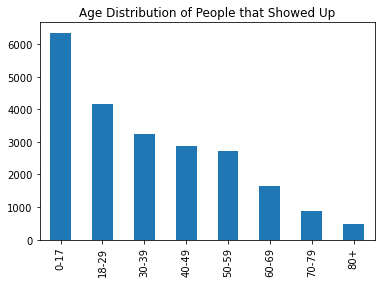

In [230]:
new_no_show_appt['age_range'].value_counts().plot(kind='bar', label = 'Distribution', title= 'Age Distribution of People that Showed Up')

### What is the mean age of people that showed up?

In [197]:

show_up = no_show_appt[no_show_appt['No-show'] == "Yes"]
average_show_up_age = show_up[["Age"]].mean()
average_show_up_age


Age    34.317667
dtype: float64

Finding: The average age of people that showed is approximately 34 years

### What is the mean age of those than showed up?

In [128]:
age_show_up = no_show_appt[no_show_appt['No-show'] == "No"]
average_show_up_age = age_show_up[["Age"]].mean()
average_show_up_age

Age    37.790064
dtype: float64

Finding: The average age of people that showed is approximately 37.8 years

### What percentage of people that showed up, got SMS or did not?

In [144]:
sms_show_up = show_up[show_up['SMS_received'] == 1].count().SMS_received
pct_sms_show_up = (sms_show_up/show) * 100
pct_sms_show_up

43.83708947533492

Findings: 43.8% of people that showed up received SMS

In [145]:
no_sms_show_up = show_up[show_up['SMS_received'] == 0].count().SMS_received
pct_no_sms_show_up = (sms_no_show_up/show) * 100
pct_no_sms_show_up

56.16291052466509

Findings: 56.1% of people that showed up did not receive SMS